In [246]:
import keras
import matplotlib
import subprocess
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.python.platform import build_info as build

In [261]:
print("Tensorflow".ljust(25) + f":{tf.__version__}")
print("Keras".ljust(25) + f":{keras.__version__}")
print("GPU Available".ljust(25) + f":{len(tf.config.experimental.list_physical_devices('GPU'))}")
print("Cuda Built".ljust(25) + f":{tf.test.is_built_with_cuda()}")
print("Cuda Version".ljust(25) + f":{build.build_info['cuda_version'].split('_')[1][:2]}" +"."+ f"{build.build_info['cuda_version'].split('_')[1][2:]}")
print("Cudnn Version".ljust(25) + f":{build.build_info['cudnn_version'].split('_')[1]}")
print("List Tensorflow GPUs".ljust(25) + f":{tf.config.list_physical_devices('GPU')}")
print("Name of GPU".ljust(25) + f":{subprocess.check_output('nvidia-smi --query-gpu=gpu_name --format=csv', shell=True).decode().splitlines()[1]}")
print("Numpy Version".ljust(25) + f":{np.__version__}")
print("Pandas Version".ljust(25) + f":{pd.__version__}")
print("Matplotlib Version".ljust(25) + f":{matplotlib.__version__}")

Tensorflow               :2.10.1
Keras                    :2.10.0
GPU Available            :1
Cuda Built               :True
Cuda Version             :11.2
Cudnn Version            :8
List Tensorflow GPUs     :[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Name of GPU              :NVIDIA GeForce RTX 3070 Ti Laptop GPU
Numpy Version            :1.22.3
Pandas Version           :1.5.3
Matplotlib Version       :3.7.1


In [85]:
data = pd.read_csv('../data/samples_without_nan.csv', usecols=['id_sample','init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'])
data['date_time_init'] = pd.to_datetime(data['date_time_init'])
data['date_time_end'] = pd.to_datetime(data['date_time_end'])
data['DayOfWeek'] = data['date_time_init'].dt.weekday
#data.set_index('date_time_init', inplace= True)

Mostrar dataset

In [86]:
data

,id_sample,init_stop,end_stop,linkref,date_time_init,date_time_end,time_travel,DayOfWeek
0,0,0,36,0:36,2023-03-01 07:24:22,2023-03-01 07:27:33,191.0,2
1,0,36,37,36:37,2023-03-01 07:27:33,2023-03-01 07:29:19,106.0,2
2,0,37,38,37:38,2023-03-01 07:29:19,2023-03-01 07:30:49,90.0,2
3,0,38,39,38:39,2023-03-01 07:30:49,2023-03-01 07:31:13,24.0,2
4,0,39,40,39:40,2023-03-01 07:31:13,2023-03-01 07:32:29,76.0,2
...,...,...,...,...,...,...,...,...
212392,2559,113,114,113:114,2023-03-25 07:51:20,2023-03-25 07:51:32,12.0,5
212393,2559,114,115,114:115,2023-03-25 07:51:32,2023-03-25 07:53:02,90.0,5
212394,2559,115,116,115:116,2023-03-25 07:53:02,2023-03-25 07:53:14,12.0,5
212395,2559,116,117,116:117,2023-03-25 07:53:14,2023-03-25 07:53:26,12.0,5


Imprimir si existen NAN en el dataset

In [87]:
print('Cantidad de NaNs:')
for column in data:
    nans = data[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna id_sample: 0
	Columna init_stop: 0
	Columna end_stop: 0
	Columna linkref: 0
	Columna date_time_init: 0
	Columna date_time_end: 0
	Columna time_travel: 0
	Columna DayOfWeek: 0


Mostrar los 15 datos con viaje de paradero a paradero mas duraderos

In [88]:
max_x=data.nlargest(15, ['time_travel'])
max_x

,id_sample,init_stop,end_stop,linkref,date_time_init,date_time_end,time_travel,DayOfWeek
51543,621,0,36,0:36,2023-03-06 09:57:29,2023-03-06 10:30:40,1991.0,0
10541,127,0,36,0:36,2023-03-01 14:04:39,2023-03-01 14:37:49,1990.0,2
67811,817,0,36,0:36,2023-03-08 13:13:37,2023-03-08 13:43:28,1791.0,2
15355,185,0,36,0:36,2023-03-02 09:16:27,2023-03-02 09:44:59,1712.0,3
156040,1881,0,36,0:36,2023-03-19 06:57:27,2023-03-19 07:25:01,1654.0,6
830,10,0,36,0:36,2023-03-01 14:02:10,2023-03-01 14:29:17,1627.0,2
108066,1303,0,36,0:36,2023-03-13 09:48:29,2023-03-13 10:14:56,1587.0,0
17845,215,0,36,0:36,2023-03-02 14:18:57,2023-03-02 14:44:37,1540.0,3
81091,977,0,36,0:36,2023-03-10 09:13:27,2023-03-10 09:38:50,1523.0,4
60839,733,0,36,0:36,2023-03-07 09:20:49,2023-03-07 09:45:42,1493.0,1


Mostrar los 15 datos con viaje de paradero a paradero menos duraderos

In [89]:
min_x=data.nsmallest(15, ['time_travel'])
min_x

,id_sample,init_stop,end_stop,linkref,date_time_init,date_time_end,time_travel,DayOfWeek
198553,2393,52,53,52:53,2023-03-23 05:18:22,2023-03-23 05:18:25,3.0,3
609,7,63,64,63:64,2023-03-01 05:10:58,2023-03-01 05:11:02,4.0,2
22316,268,107,108,107:108,2023-03-03 19:26:10,2023-03-03 19:26:14,4.0,4
108249,1305,52,53,52:53,2023-03-13 07:02:07,2023-03-13 07:02:11,4.0,0
128833,1553,52,53,52:53,2023-03-16 05:03:05,2023-03-16 05:03:09,4.0,3
131240,1582,52,53,52:53,2023-03-16 09:35:56,2023-03-16 09:36:00,4.0,3
149638,1803,107,108,107:108,2023-03-18 10:01:34,2023-03-18 10:01:38,4.0,5
181383,2186,63,64,63:64,2023-03-22 05:03:02,2023-03-22 05:03:06,4.0,2
207766,2504,52,53,52:53,2023-03-24 04:52:31,2023-03-24 04:52:35,4.0,4
211584,2550,52,53,52:53,2023-03-25 05:31:30,2023-03-25 05:31:34,4.0,5


Observacion de los datos del time_travel

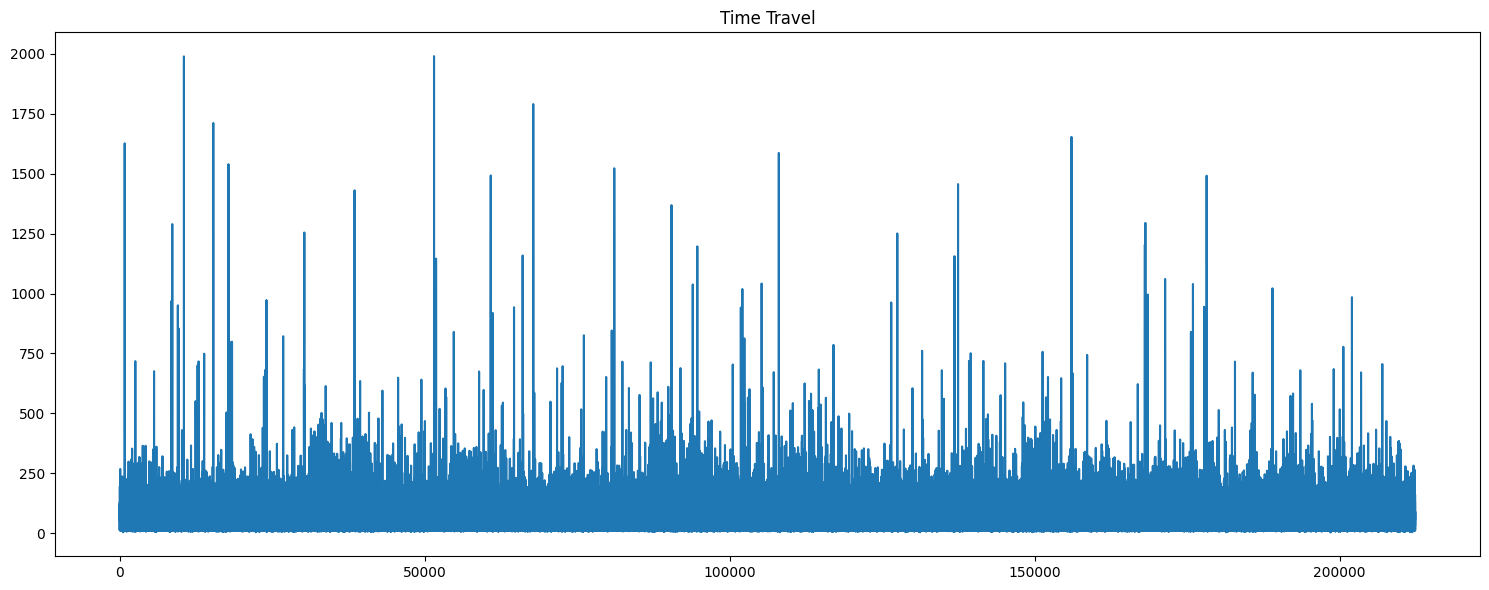

In [90]:
plt.figure(figsize=(15, 6))
data['time_travel'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Time Travel")
plt.tight_layout()
plt.show()

Observacion de las columnas del dataset

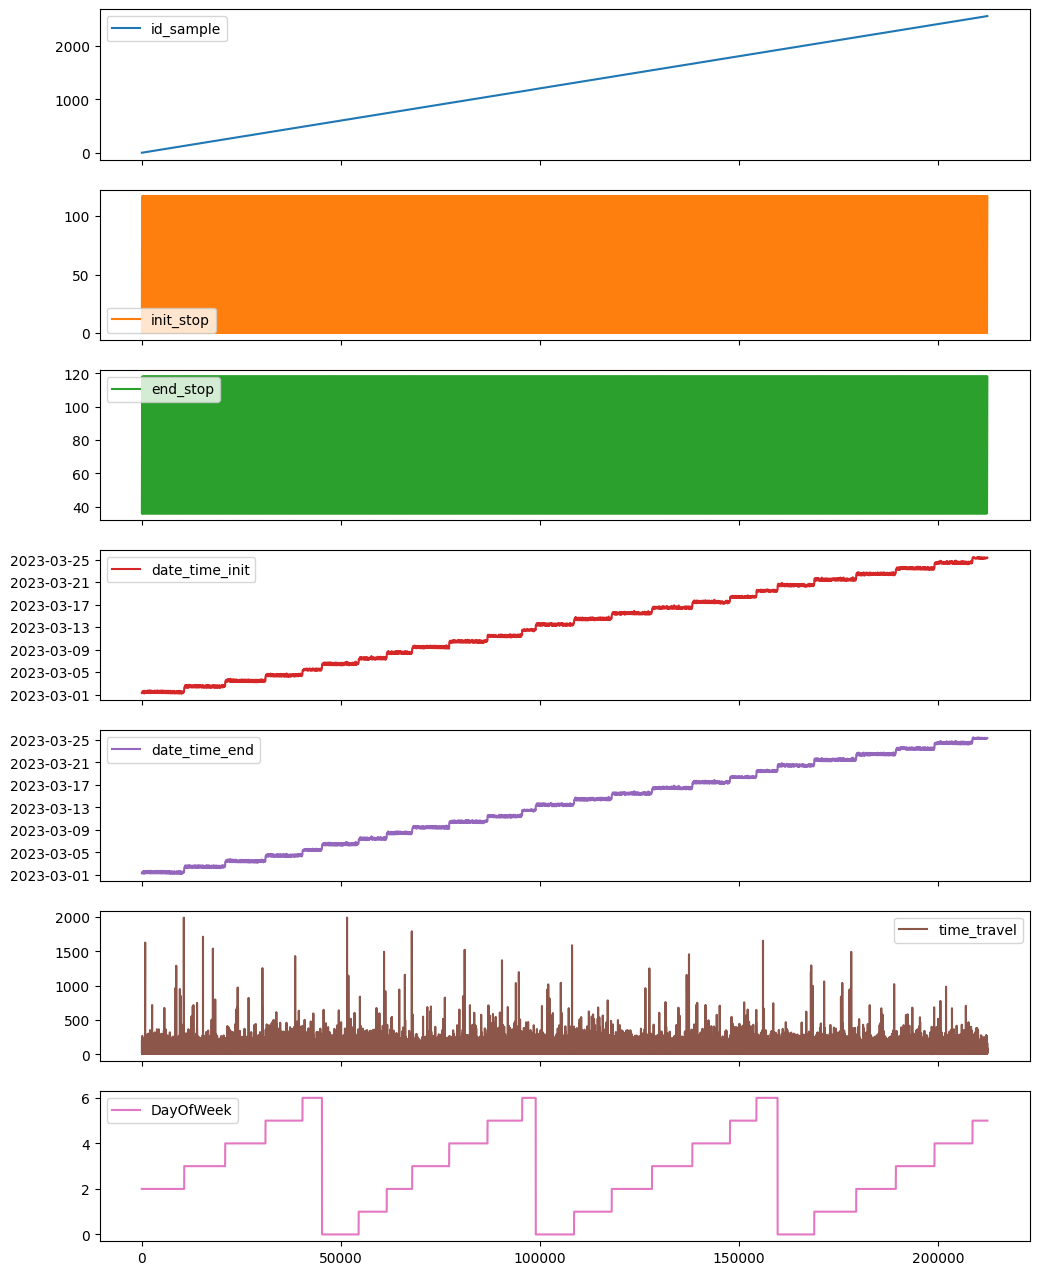

In [91]:
cols = data.columns

# Dibujar la totalidad de registros
N = data.shape[0]       # Número de registros
plots = data[cols][0:N] # Series de tiempo individuales
plots.index = data.index[0:N] # Variable tiempo
_ = plots.plot(subplots=True, figsize=(12,16))


Ajuste de periodicidad, en estas pruebas se considera hacer fracciones de tiempo cada 1 minuto

In [92]:
#Crear una columna que sera indice de periodicidad
ix = pd.DatetimeIndex(pd.to_datetime(data['date_time_init'])).floor('1min')#.floor('10S')#.floor('0.1min')
data["datetime"] = ix

#Crear indice datetime
data.set_index('datetime', inplace= True)
data

,id_sample,init_stop,end_stop,linkref,date_time_init,date_time_end,time_travel,DayOfWeek
datetime,,,,,,,,
2023-03-01 07:24:00,0,0,36,0:36,2023-03-01 07:24:22,2023-03-01 07:27:33,191.0,2
2023-03-01 07:27:00,0,36,37,36:37,2023-03-01 07:27:33,2023-03-01 07:29:19,106.0,2
2023-03-01 07:29:00,0,37,38,37:38,2023-03-01 07:29:19,2023-03-01 07:30:49,90.0,2
2023-03-01 07:30:00,0,38,39,38:39,2023-03-01 07:30:49,2023-03-01 07:31:13,24.0,2
2023-03-01 07:31:00,0,39,40,39:40,2023-03-01 07:31:13,2023-03-01 07:32:29,76.0,2
...,...,...,...,...,...,...,...,...
2023-03-25 07:51:00,2559,113,114,113:114,2023-03-25 07:51:20,2023-03-25 07:51:32,12.0,5
2023-03-25 07:51:00,2559,114,115,114:115,2023-03-25 07:51:32,2023-03-25 07:53:02,90.0,5
2023-03-25 07:53:00,2559,115,116,115:116,2023-03-25 07:53:02,2023-03-25 07:53:14,12.0,5


Elegir un sample y mostrar las diferencias de tiempo para observar los tiempos repetidos que son representados por los 0

In [93]:
#Se filtra un sample y se ejecuta el analisis
df_filtrado = data[data['id_sample'] == 0]
df_time_diffs = df_filtrado.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

60.0     43
0.0      23
120.0    15
180.0     1
Name: datetime, dtype: int64


Elegir todos samples y mostrar las diferencias de tiempo para observar los tiempos repetidos que son representados por los 0

In [94]:
df_list = pd.DataFrame()
#Iterar los samples y concatenar
for value in data['id_sample'].unique():
    df_filtrado = data[data['id_sample'] == value]
    df_time_diffs = df_filtrado.index.to_series().diff().dt.total_seconds()
    df_list = pd.concat([df_list,df_time_diffs], axis=0)

print(df_list.value_counts())

60.0      109196
0.0        63647
120.0      26905
180.0       7280
240.0       1864
300.0        495
360.0        207
420.0         93
480.0         37
540.0         21
600.0         16
660.0         15
720.0         13
960.0          7
1020.0         7
780.0          6
840.0          5
1500.0         4
1140.0         3
1680.0         2
1560.0         2
1980.0         2
1320.0         2
1260.0         2
1200.0         2
1380.0         1
1440.0         1
1620.0         1
1800.0         1
900.0          1
dtype: int64


Guardar dataset procesado

In [95]:
data.to_csv('../data/dataset_v1.csv')

# Crear sets de entrenamiento, validación y prueba

Leer el dataset procesado anteriormente

In [136]:
df = pd.read_csv('../data/dataset_v1.csv')
df

,datetime,id_sample,init_stop,end_stop,linkref,date_time_init,date_time_end,time_travel,DayOfWeek
0,2023-03-01 07:24:00,0,0,36,0:36,2023-03-01 07:24:22,2023-03-01 07:27:33,191.0,2
1,2023-03-01 07:27:00,0,36,37,36:37,2023-03-01 07:27:33,2023-03-01 07:29:19,106.0,2
2,2023-03-01 07:29:00,0,37,38,37:38,2023-03-01 07:29:19,2023-03-01 07:30:49,90.0,2
3,2023-03-01 07:30:00,0,38,39,38:39,2023-03-01 07:30:49,2023-03-01 07:31:13,24.0,2
4,2023-03-01 07:31:00,0,39,40,39:40,2023-03-01 07:31:13,2023-03-01 07:32:29,76.0,2
...,...,...,...,...,...,...,...,...,...
212392,2023-03-25 07:51:00,2559,113,114,113:114,2023-03-25 07:51:20,2023-03-25 07:51:32,12.0,5
212393,2023-03-25 07:51:00,2559,114,115,114:115,2023-03-25 07:51:32,2023-03-25 07:53:02,90.0,5
212394,2023-03-25 07:53:00,2559,115,116,115:116,2023-03-25 07:53:02,2023-03-25 07:53:14,12.0,5
212395,2023-03-25 07:53:00,2559,116,117,116:117,2023-03-25 07:53:14,2023-03-25 07:53:26,12.0,5


In [138]:
def train_val_test_split(serie, tr_size, vl_size, ts_size):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

Se dispondra que del total de samples:
  - 80% seran para entrenamiento
  - 10% para validación 
  - 10% para test

In [139]:
tr_size=0.8
vl_size=0.1 
ts_size=0.1

tr, vl, ts = train_val_test_split(data['time_travel'],tr_size,vl_size,ts_size)

# Imprimir en pantalla el tamaño de cada subset
print(f'Tamaño total de datos      ({100}%):  {data.shape[0]}')
print(f'Tamaño set de entrenamiento ({int(tr_size*100)}%):  {tr.shape[0]}')
print(f'Tamaño set de validación    ({int(vl_size*100)}%):  {vl.shape[0]}')
print(f'Tamaño set de prueba        ({int(ts_size*100)}%):  {ts.shape[0]}')

Tamaño total de datos      (100%):  212397
Tamaño set de entrenamiento (80%):  169917
Tamaño set de validación    (10%):  21239
Tamaño set de prueba        (10%):  21241


Mostrar los datos que se han dividido

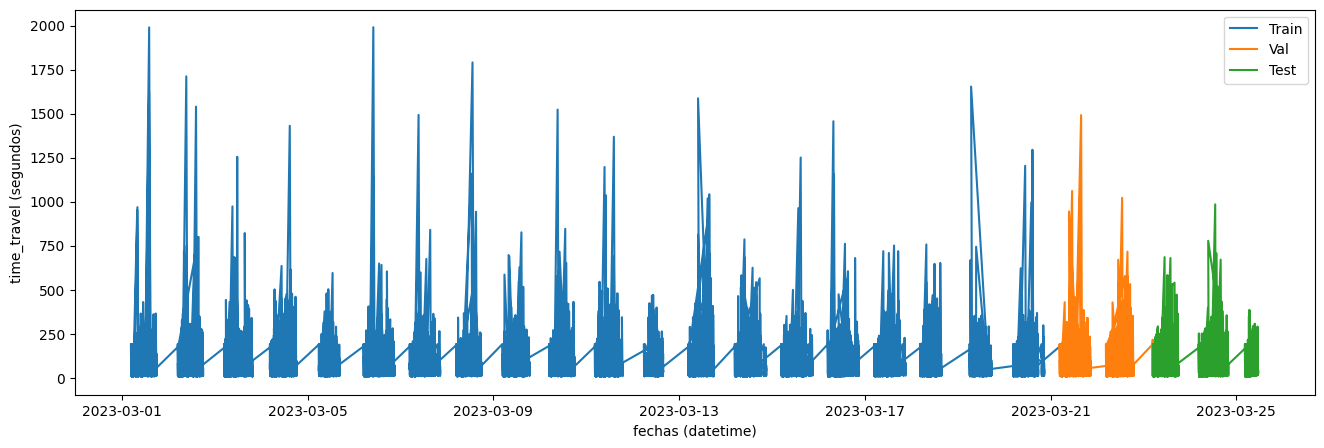

In [144]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.ylabel('time_travel (segundos)')
plt.xlabel('fechas (datetime)')
plt.legend();

Generar los datasets normalizados y organizar secuencias

In [140]:
X, Y = [], []

In [262]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos, f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [263]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 83    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (169833, 83, 1), y_tr: (169833, 1, 1)
Set de validación - x_vl: (21155, 83, 1), y_vl: (21155, 1, 1)
Set de prueba - x_ts: (21157, 83, 1), y_ts: (21157, 1, 1)


In [264]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    
    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])
    
    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [265]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')

Min x_tr/x_vl/x_ts sin escalamiento: 4.0/4.0/3.0
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-1.0/-1.0010065425264216

Min y_tr/y_vl/y_ts sin escalamiento: 4.0/4.0/3.0
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-1.0/-1.0010065425264216

Max x_tr/x_vl/x_ts sin escalamiento: 1991.0/1492.0/985.0
Max x_tr/x_vl/x_ts con escalamiento: 1.0/0.49773527931555095/-0.01258178158027179

Max y_tr/y_vl/y_ts sin escalamiento: 1991.0/1492.0/985.0
Max y_tr/y_vl/y_ts con escalamiento: 1.0/0.49773527931555095/-0.01258178158027179


In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Crear frecuencias de tiempo cada 15 minutos

In [107]:
data.reset_index(inplace=True)
ix = pd.DatetimeIndex(pd.to_datetime(data['date_time_init'])).floor('15min')
data["DateTimeRef"] = ix
data["DowTimeRef"] = pd.to_datetime((data['DayOfWeek'].values - 1) * 24 * 60 * 60 + ix.hour * 60 * 60 + ix.minute * 60, unit = 's')
data

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
1,2023-03-01 07:27:33,36,37,36:37,2023-03-01 07:29:19,106.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
2,2023-03-01 07:29:19,37,38,37:38,2023-03-01 07:30:49,90.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
3,2023-03-01 07:30:49,38,39,38:39,2023-03-01 07:31:13,24.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
4,2023-03-01 07:31:13,39,40,39:40,2023-03-01 07:32:29,76.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
...,...,...,...,...,...,...,...,...,...
212475,2023-03-25 07:51:20,113,114,113:114,2023-03-25 07:51:32,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212476,2023-03-25 07:51:32,114,115,114:115,2023-03-25 07:53:02,90.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212477,2023-03-25 07:53:02,115,116,115:116,2023-03-25 07:53:14,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212478,2023-03-25 07:53:14,116,117,116:117,2023-03-25 07:53:26,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212480 entries, 0 to 212479
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_time_init  212480 non-null  datetime64[ns]
 1   init_stop       212480 non-null  int64         
 2   end_stop        212480 non-null  int64         
 3   linkref         212480 non-null  object        
 4   date_time_end   212480 non-null  datetime64[ns]
 5   time_travel     212480 non-null  float64       
 6   DayOfWeek       212480 non-null  int64         
 7   DateTimeRef     212480 non-null  datetime64[ns]
 8   DowTimeRef      212480 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3), object(1)
memory usage: 14.6+ MB


Filtrar datos por paradero

In [109]:
data_filtrado = data[data['linkref'] == '0:36']
data_filtrado

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
83,2023-03-01 10:34:33,0,36,0:36,2023-03-01 10:35:55,82.0,2,2023-03-01 10:30:00,1970-01-02 10:30:00
166,2023-03-01 14:02:05,0,36,0:36,2023-03-01 14:04:13,128.0,2,2023-03-01 14:00:00,1970-01-02 14:00:00
249,2023-03-01 06:37:35,0,36,0:36,2023-03-01 06:39:17,102.0,2,2023-03-01 06:30:00,1970-01-02 06:30:00
332,2023-03-01 09:31:18,0,36,0:36,2023-03-01 09:32:15,57.0,2,2023-03-01 09:30:00,1970-01-02 09:30:00
...,...,...,...,...,...,...,...,...,...
212065,2023-03-25 07:07:53,0,36,0:36,2023-03-25 07:09:13,80.0,5,2023-03-25 07:00:00,1970-01-05 07:00:00
212148,2023-03-25 06:16:20,0,36,0:36,2023-03-25 06:18:02,102.0,5,2023-03-25 06:15:00,1970-01-05 06:15:00
212231,2023-03-25 06:21:51,0,36,0:36,2023-03-25 06:23:33,102.0,5,2023-03-25 06:15:00,1970-01-05 06:15:00
212314,2023-03-25 07:01:28,0,36,0:36,2023-03-25 07:03:10,102.0,5,2023-03-25 07:00:00,1970-01-05 07:00:00


In [110]:
bootstrap_size_pct = 0.75
test_window_pct = 0.05
n = len(data)
i=1

# Devide into test and train
data_train = data[:int((bootstrap_size_pct + i * test_window_pct) * n)]
data_test = data[int((bootstrap_size_pct + i * test_window_pct) * n):int((bootstrap_size_pct + (i + 1) * test_window_pct) * n)]

In [111]:
data_train

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
1,2023-03-01 07:27:33,36,37,36:37,2023-03-01 07:29:19,106.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
2,2023-03-01 07:29:19,37,38,37:38,2023-03-01 07:30:49,90.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
3,2023-03-01 07:30:49,38,39,38:39,2023-03-01 07:31:13,24.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
4,2023-03-01 07:31:13,39,40,39:40,2023-03-01 07:32:29,76.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
...,...,...,...,...,...,...,...,...,...
169979,2023-03-21 13:24:03,113,114,113:114,2023-03-21 13:24:16,13.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169980,2023-03-21 13:24:16,114,115,114:115,2023-03-21 13:25:03,47.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169981,2023-03-21 13:25:03,115,116,115:116,2023-03-21 13:25:22,19.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169982,2023-03-21 13:25:22,116,117,116:117,2023-03-21 13:25:35,13.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00


In [112]:
data_test

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
169984,2023-03-21 15:16:13,0,36,0:36,2023-03-21 15:17:55,102.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169985,2023-03-21 15:17:55,36,37,36:37,2023-03-21 15:19:26,91.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169986,2023-03-21 15:19:26,37,38,37:38,2023-03-21 15:21:13,107.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169987,2023-03-21 15:21:13,38,39,38:39,2023-03-21 15:21:59,46.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169988,2023-03-21 15:21:59,39,40,39:40,2023-03-21 15:23:04,65.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
...,...,...,...,...,...,...,...,...,...
180603,2023-03-22 15:09:30,113,114,113:114,2023-03-22 15:09:40,10.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180604,2023-03-22 15:09:40,114,115,114:115,2023-03-22 15:10:16,36.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180605,2023-03-22 15:10:16,115,116,115:116,2023-03-22 15:10:52,36.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180606,2023-03-22 15:10:52,116,117,116:117,2023-03-22 15:11:04,12.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00


In [114]:
import datetime
def info(msg):
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " " + msg)

n_train = len(data_train)
n_test = len(data_test)
info('- Train size : {:>8} ({:.2f}%) '.format(n_train, 1. * n_train / n))
info('- Test size  : {:>8} ({:.2f}%) '.format(n_test, 1. * n_test / n))

2023-04-17 16:02:51 - Train size :   169984 (0.80%) 
2023-04-17 16:02:51 - Test size  :    10624 (0.05%) 


# Pruebas con un modelo LSTM

In [115]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# leer el archivo csv
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'])

# convertir la columna date_time_init a datetime
data['date_time_init'] = pd.to_datetime(data['date_time_init'])

# agrupar los datos por enlace y hora de salida para obtener una secuencia de tiempo
grouped_data = data.groupby(['linkref', pd.Grouper(key='date_time_init', freq='H')])['time_travel'].mean().reset_index()

# dividir los datos en entrenamiento y prueba
train_size = int(len(grouped_data) * 0.8)
train_data, test_data = grouped_data[:train_size], grouped_data[train_size:]

# normalizar los datos de entrada
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_norm = scaler.fit_transform(train_data[['time_travel']])
test_data_norm = scaler.transform(test_data[['time_travel']])

# función para crear secuencias de tiempo
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# crear secuencias de tiempo para los datos de entrenamiento y prueba
seq_length = 24
X_train, y_train = create_sequences(train_data_norm, seq_length)
X_test, y_test = create_sequences(test_data_norm, seq_length)

# construir el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# hacer predicciones para los datos de prueba
y_pred = model.predict(X_test)


Epoch 1/50
675/675 [==============================] - 9s 6ms/step - loss: 8.4706e-04 - val_loss: 5.6862e-04
Epoch 2/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1055e-05 - val_loss: 5.4156e-04
Epoch 3/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1314e-05 - val_loss: 5.4550e-04
Epoch 4/50
675/675 [==============================] - 4s 6ms/step - loss: 7.3620e-05 - val_loss: 5.6109e-04
Epoch 5/50
675/675 [==============================] - 4s 6ms/step - loss: 7.2972e-05 - val_loss: 5.6008e-04
Epoch 6/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1149e-05 - val_loss: 5.3361e-04
Epoch 7/50
675/675 [==============================] - 4s 6ms/step - loss: 7.6613e-05 - val_loss: 5.5283e-04
Epoch 8/50
675/675 [==============================] - 4s 6ms/step - loss: 7.4783e-05 - val_loss: 5.3918e-04
Epoch 9/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1675e-05 - val_loss: 5.5424e-04
Epoch 10/50
675/675 [=======

In [39]:
len(X_train), len(y_train)

(21596, 21596)

In [40]:
len(X_test), len(y_test)

(5381, 5381)

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.0005314730609634774
Root Mean Squared Error: 0.02305369950709598


In [41]:
y_test

array([[0.35872024],
       [0.36338739],
       [0.36677339],
       ...,
       [0.36176789],
       [0.36427746],
       [0.36371261]])

In [38]:
# desnormalizar la salida
y_pred_desnormalized = scaler.inverse_transform(y_pred)

# imprimir la predicción
print(y_pred_desnormalized)

[[44.765656]
 [41.63561 ]
 [41.741196]
 ...
 [35.941006]
 [35.34355 ]
 [36.01339 ]]


In [31]:
# definir el momento de inicio del viaje
date_time_init = '2023-04-11 12:00:00'

# definir las paradas de origen y destino
init_stop = '0'
end_stop = '36'

# obtener los datos correspondientes a las paradas y el momento seleccionados
selected_data = data[(data['init_stop'] == init_stop) & (data['end_stop'] == end_stop) & (data['date_time_init'] >= date_time_init)]
selected_data = selected_data.head(seq_length)  # asegurarse de tener suficientes registros para construir una secuencia

# normalizar los datos
selected_data_norm = scaler.transform(selected_data[['time_travel']])

# crear la secuencia de tiempo
X_new, y_new = create_sequences(selected_data_norm, seq_length)

# hacer la predicción
y_pred_new = model.predict(X_new)

# desnormalizar la predicción
y_pred_new = scaler.inverse_transform(y_pred_new)

# imprimir la predicción
print('El tiempo de viaje estimado entre', init_stop, 'y', end_stop, 'a las', date_time_init, 'es:', y_pred_new[0][0], 'minutos.')

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [36]:
# Crear un nuevo conjunto de datos para hacer una predicción
new_data = pd.DataFrame({
    'init_stop': ['0'],
    'end_stop': ['36'],
    'date_time_init': ['2022-05-15 09:00:00']
})

# Convertir la columna date_time_init a datetime
new_data['date_time_init'] = pd.to_datetime(new_data['date_time_init'])

# Unir el nuevo conjunto de datos con el conjunto de datos original para obtener el linkref correspondiente
new_data = pd.merge(new_data, data[['init_stop', 'end_stop', 'date_time_init', 'linkref']], on=['init_stop', 'end_stop', 'date_time_init'], how='inner')

# Crear una secuencia de tiempo para el nuevo conjunto de datos
new_seq, _ = create_sequences(scaler.transform(new_data[['time_travel']]), seq_length)

# Hacer una predicción en el nuevo conjunto de datos normalizado
new_pred_norm = model.predict(new_seq)

# Desnormalizar la salida de la predicción
new_pred = scaler.inverse_transform(new_pred_norm)

# Mostrar la salida final de la predicción
print('La predicción de time_travel es:', new_pred[0][0])

KeyError: "None of [Index(['time_travel'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# crear el DataFrame con el dato nuevo
new_data = pd.DataFrame({
    'init_stop': [36],
    'end_stop': [37],
    'date_time_init': ['2023-04-15 08:00:00'],
    'time_travel': [0.0],
    'init_idp': [None],
    'end_idp': [None],
    'veh': [None],
    'lap': [None],
    'date': [None]
})
# convertir la columna 'date_time_init' a datetime
new_data['date_time_init'] = pd.to_datetime(new_data['date_time_init'])

# extraer características de fecha y hora
new_data['year'] = new_data['date_time_init'].dt.year
new_data['month'] = new_data['date_time_init'].dt.month
new_data['day'] = new_data['date_time_init'].dt.day
new_data['hour'] = new_data['date_time_init'].dt.hour
new_data['minute'] = new_data['date_time_init'].dt.minute

# normalizar los datos numéricos
new_data[num_cols] = scaler.transform(new_data[num_cols])

In [ ]:
# obtener las características relevantes para la predicción
new_X = new_data[relevant_cols]

# convertir los datos a un tensor de numpy
new_X = np.array(new_X)

# ajustar la forma del tensor a la requerida por el modelo LSTM
new_X = new_X.reshape((1, new_X.shape[0], new_X.shape[1]))

# hacer la predicción
y_pred = model.predict(new_X)

# invertir la normalización de la predicción
y_pred_inv = scaler_y.inverse_transform(y_pred)

# imprimir el resultado de la predicción
print('La hora de llegada estimada al paradero 37 es:', y_pred_inv[0][0])

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# cargar los datos
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'time_travel'])

# separar la columna de tiempo de llegada como la variable objetivo
target_col = 'time_travel'
y = data[target_col].values

# eliminar las columnas de fecha y hora del conjunto de datos
data = data.drop(['date_time_init', 'date_time_end'], axis=1)

# eliminar las filas con valores faltantes
data = data.dropna()

# normalizar los datos de entrada
scaler = MinMaxScaler()
X = scaler.fit_transform(data.values)

# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# definir el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

# hacer predicciones para los datos de prueba
y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# calcular las métricas de evaluación en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# imprimir las métricas de evaluación
print('r2 score: {:.4f}'.format(r2))
print('mse: {:.4f}'.format(mse))
print('mae: {:.4f}'.format(mae))

KeyError: "['date_time_init', 'date_time_end'] not found in axis"

# Pruebas 2 LSTM

Importar las librerías necesarias:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout

Cargar los datos y convertir las fechas en formato datetime:

In [105]:
#Leer datos necesarios
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'], parse_dates=['date_time_init', 'date_time_end'])
len(data)

212480

In [106]:
# Separar los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
print('Datos de entrenamiento: ',len(train_data),'\nDatos de test: ',len(test_data),'\nTotal de datos: ',len(train_data)+len(test_data))

Datos de entrenamiento:  169984 
Datos de test:  42496 
Total de datos:  212480


Normalizar datos

In [107]:
# Normalizar los datos
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['init_stop', 'end_stop', 'time_travel']])
test_scaled = scaler.transform(test_data[['init_stop', 'end_stop', 'time_travel']])

Separar conjunto de datos (entrenamiento y prueba)

In [108]:
# Crear conjuntos de datos de entrenamiento y prueba
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, :])
    y_train.append(train_scaled[i, 2])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_scaled)):
    X_test.append(test_scaled[i-60:i, :])
    y_test.append(test_scaled[i, 2])
X_test, y_test = np.array(X_test), np.array(y_test)

Crear modelo CuDNNLSTM

In [121]:
# Crear el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

Entrenar modelo

In [118]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
5311/5311 [==============================] - 40s 7ms/step - loss: 3.7693e-04 - val_loss: 9.1060e-06
Epoch 2/50
5311/5311 [==============================] - 38s 7ms/step - loss: 2.1775e-05 - val_loss: 8.6868e-06
Epoch 3/50
5311/5311 [==============================] - 37s 7ms/step - loss: 2.0682e-05 - val_loss: 1.0340e-05
Epoch 4/50
5311/5311 [==============================] - 38s 7ms/step - loss: 2.0114e-05 - val_loss: 8.5357e-06
Epoch 5/50
5311/5311 [==============================] - 36s 7ms/step - loss: 1.9700e-05 - val_loss: 8.7471e-06
Epoch 6/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.9235e-05 - val_loss: 8.5064e-06
Epoch 7/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.9100e-05 - val_loss: 8.9141e-06
Epoch 8/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.8872e-05 - val_loss: 8.6108e-06
Epoch 9/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.8811e-05 - val_loss: 8.5371e-06
E

In [103]:
from datetime import timedelta

# Convertir los tiempos predichos a segundos y luego a enteros
y_pred_sec = y_pred.astype(int)

# Crear una lista de objetos timedelta
y_pred_timedelta = [timedelta(seconds=int(x)) for x in y_pred_sec]

# Imprimir los primeros 10 valores
print(y_pred_timedelta[0])

0:00:54
